In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("marketing_campaign.csv",sep="\t")

In [4]:
len(df)

2240

In [5]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df=df.dropna()

In [8]:
print("length of dataset after dropping NAN values:",len(df))

length of dataset after dropping NAN values: 2216


In [9]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [10]:
df.Dt_Customer.dtype

dtype('<M8[ns]')

In [11]:
dates=[]
for i in df["Dt_Customer"]:
    i=i.date()
    dates.append(i)

In [12]:
print("dates of newest customers enrolment:",max(dates))
print("dates of oldest customers enrolment:",min(dates))

dates of newest customers enrolment: 2014-12-06
dates of oldest customers enrolment: 2012-01-08


In [13]:
days=[]
d1=max(dates) #assuming for newest customer
for i in dates:
    dnew=d1-i
    days.append(dnew)
df["Customer_Days"]=days
df["Customer_Days"]=pd.to_numeric(df["Customer_Days"],errors="coerce")

In [14]:
df.Customer_Days

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_Days, Length: 2216, dtype: int64

In [15]:
print("categories in Marital_Status attribute:\n", df["Marital_Status"].value_counts(),"\n")
print("categories inEducation attribute:\n",df["Education"].value_counts())

categories in Marital_Status attribute:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

categories inEducation attribute:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [16]:
df["Age"]=2023-df["Year_Birth"]

In [17]:
df["Spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [18]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd":"Alone","Widow":"Alone",
                                               "YOLO":"Alone","Divorced":"Alone","Single":"Alone"})

In [19]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [20]:
df["Family_Size"]=df["Living_With"].replace({"Alone":1,"Partner":2})+df["Children"]

In [21]:
df["Is_Parent"]=np.where(df["Children"]>0,1,0)

In [22]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate",
                                         "Master":"Postgraduate","PhD":"Postgraduate"})

In [23]:
df=df.rename(columns={"MntWines":"Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish",
                      "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [24]:
for_drop=["Marital_Status","Dt_Customer","Z_CostContact","Z_Revenue","Year_Birth","ID"]
df=df.drop(for_drop,axis=1)

In [25]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_Days  \
count   2216.000000   2216.000000  2216.000000  2216.000000   2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271   4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417   2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000   0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000   2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000   4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000   5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000   9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

plot for selected features: data subset


<Figure size 800x550 with 0 Axes>

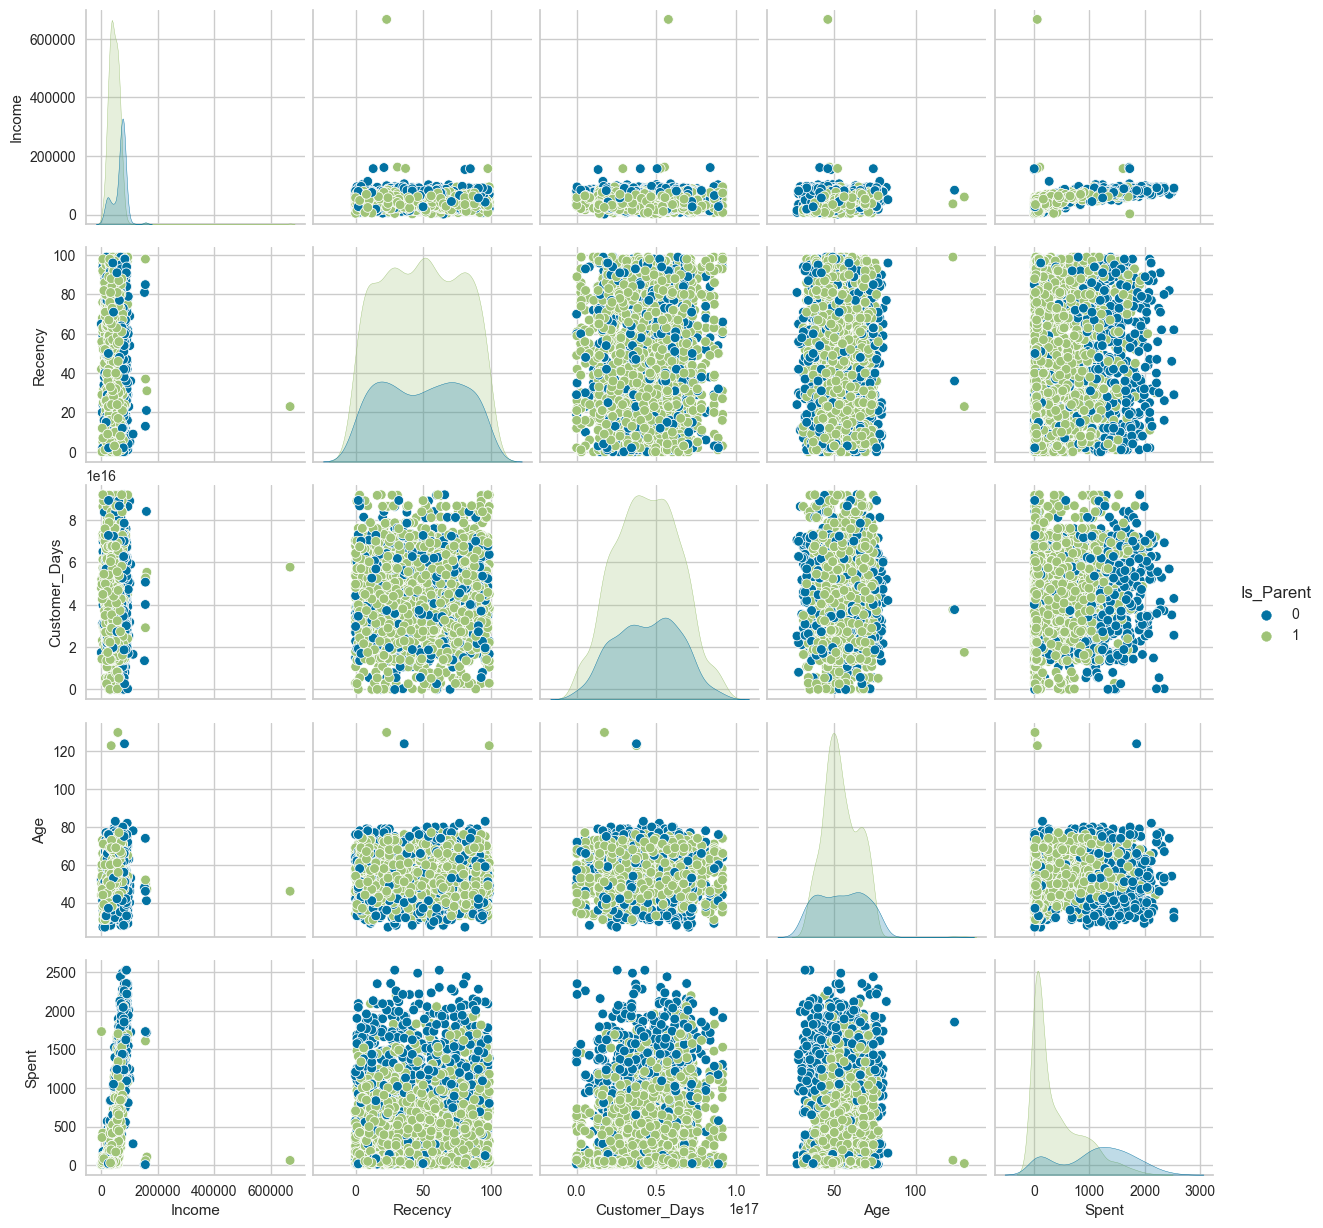

In [26]:
Plot_cols=["Income","Recency","Customer_Days","Age","Spent","Is_Parent"]
print("plot for selected features: data subset")
plt.figure()
sns.pairplot(df[Plot_cols], hue="Is_Parent")
plt.show()

In [27]:
df=df[(df["Age"]<90)]
df=df[(df["Income"]<600000)]

In [28]:
df.shape[0]

2212

<Axes: >

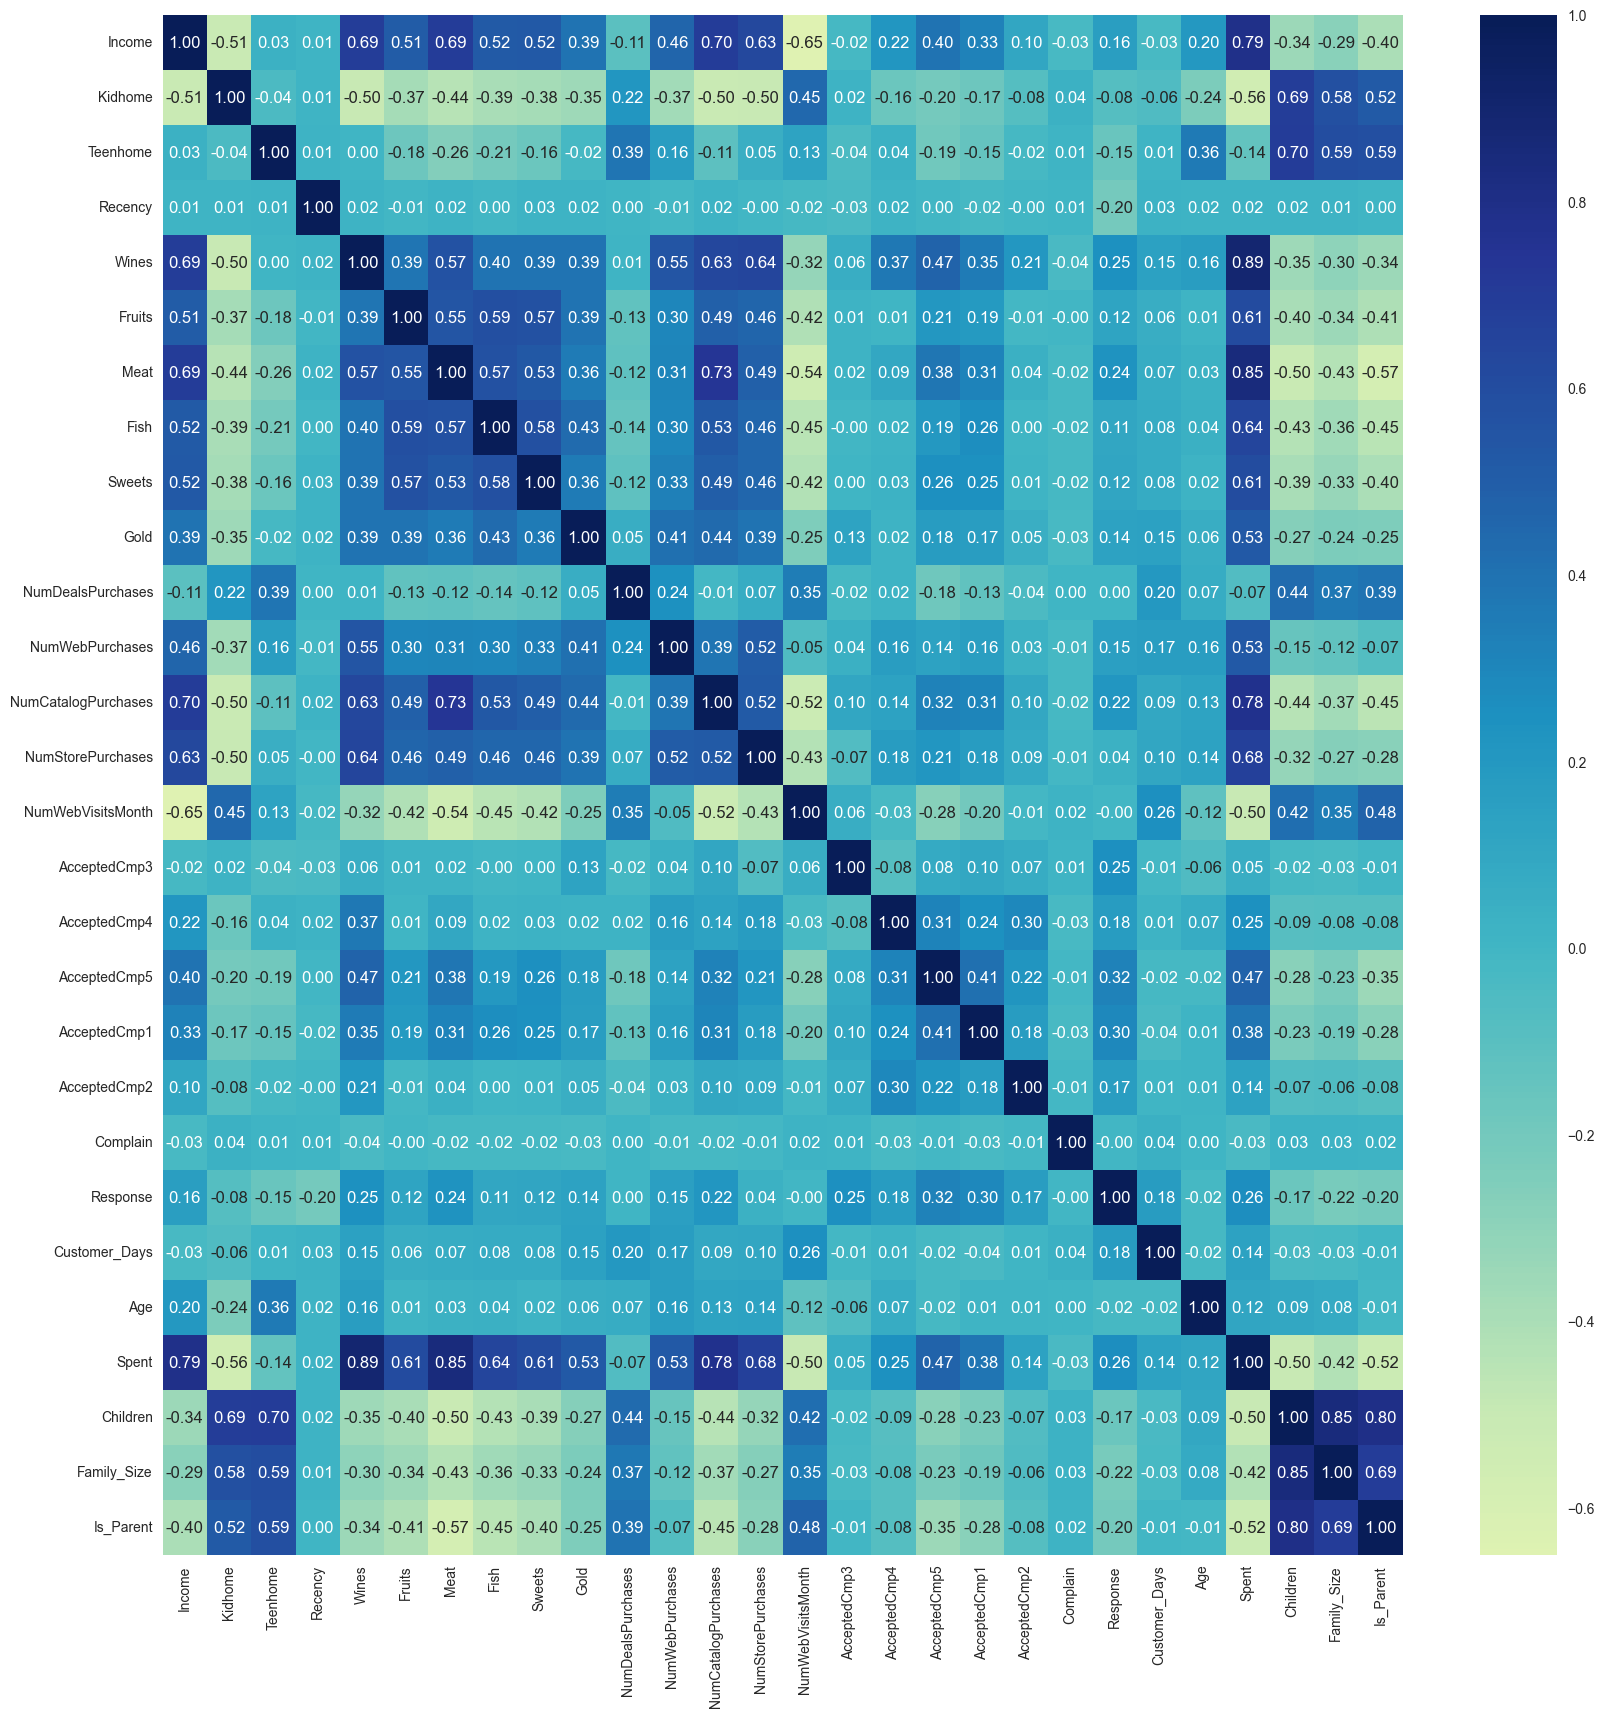

In [29]:
cormatrix=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cormatrix, annot=True, cmap="YlGnBu", center=0, fmt=".2f")

In [30]:
s=(df.dtypes=="object")
obj_cols=list(s[s].index)
print("categorical variables:",obj_cols)

categorical variables: ['Education', 'Living_With']


In [31]:
Le=LabelEncoder()
for i in obj_cols:
    df[i]=df[[i]].apply(Le.fit_transform)

In [32]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Days',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [33]:
copy_df=df.copy()
cols_to_del=["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Response"]
copy_df=copy_df.drop(cols_to_del,axis=1)

In [34]:
scaler=StandardScaler()
scaler.fit(copy_df)
scaled_copy_df=pd.DataFrame(scaler.transform(copy_df),columns=copy_df.columns)

In [35]:
scaled_copy_df.head(10)

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
5   0.571657  0.490381 -0.822754  0.908097 -1.141097  0.636663  0.394373   
6  -0.893586  0.170807 -0.822754  0.908097 -0.519047 -0.208416  0.973207   
7   0.571657 -0.859793  1.040021 -0.929699 -0.588164 -0.679881 -0.410961   
8   0.571657 -1.003968  1.040021 -0.929699 -1.037422 -0.863722 -0.662628   
9   0.571657 -2.151748  1.040021  0.908097  0.655937 -0.822210 -0.662628   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   
5 -0.307889 -0.687527  0.363993  ...             0.453643           1.290224   
6 -0.013514  0.225554  0.534385  ...             0.111982           0.367205   
7 -0.495218 -0.632742 -0.634019  ...            -0.913000          -0.555814   
8 -0.637946 -0.632742 -0.585335  ...            -0.913000          -1.171160   
9 -0.718230 -0.669265 -0.634019  ...            -0.913000          -1.786506   

   NumWebVisitsMonth  Customer_Days       Age     Spent  Living_With  \
0           0.692181       1.973583  1.018352  1.676245    -1.349603   
1          -0.132545      -1.665144  1.274785 -0.963297    -1.349603   
2          -0.544908      -0.172664  0.334530  0.280110     0.740959   
3           0.279818      -1.923210 -1.289547 -0.920135     0.740959   
4          -0.132545      -0.822130 -1.033114 -0.307562     0.740959   
5           0.279818      -0.254385  0.163575  0.180505     0.740959   
6           0.279818       1.035944 -0.178336 -0.028667    -1.349603   
7           1.104543      -0.103847 -1.375024 -0.727564     0.740959   
8           1.516906       0.154219 -0.434769 -0.931755     0.740959   
9           6.052898      -1.050088  1.616696 -0.926775     0.740959   

   Children  Family_Size  Is_Parent  
0 -1.264598    -1.758359  -1.581139  
1  1.404572     0.449070   0.632456  
2 -1.264598    -0.654644  -1.581139  
3  0.069987     0.449070   0.632456  
4  0.069987     0.449070   0.632456  
5  0.069987     0.449070   0.632456  
6  0.069987    -0.654644   0.632456  
7  0.069987     0.449070   0.632456  
8  0.069987     0.449070   0.632456  
9  1.404572     1.552784   0.632456  

[10 rows x 23 columns]

In [36]:
pca=PCA(n_components=3)
pca.fit(scaled_copy_df)
PCA_df=pd.DataFrame(pca.transform(scaled_copy_df),columns=(["col1","col2","col3"]))

In [37]:
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  6.424437e-18  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0  6.424437e-17  1.706839 -4.312239 -1.328313 -0.158077  1.242324   
col3  2212.0  7.147186e-17  1.221956 -3.529321 -0.828838 -0.021984  0.799093   

           max  
col1  7.444305  
col2  6.142749  
col3  6.611925

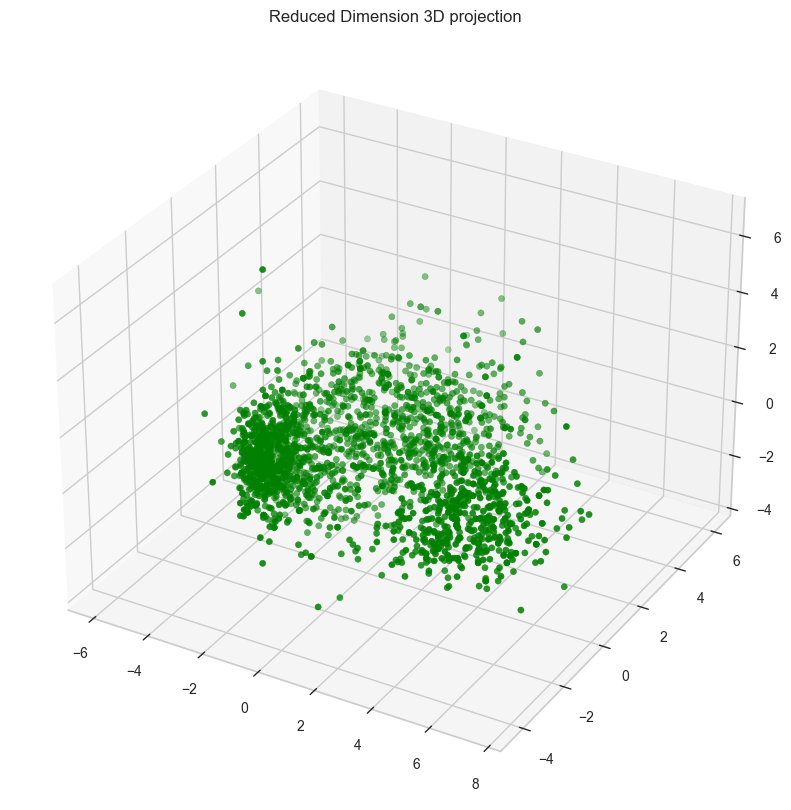

In [38]:
x=PCA_df["col1"]
y=PCA_df["col2"]
z=PCA_df["col3"]
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z, c="green", marker="o")
ax.set_title("Reduced Dimension 3D projection")
plt.show()

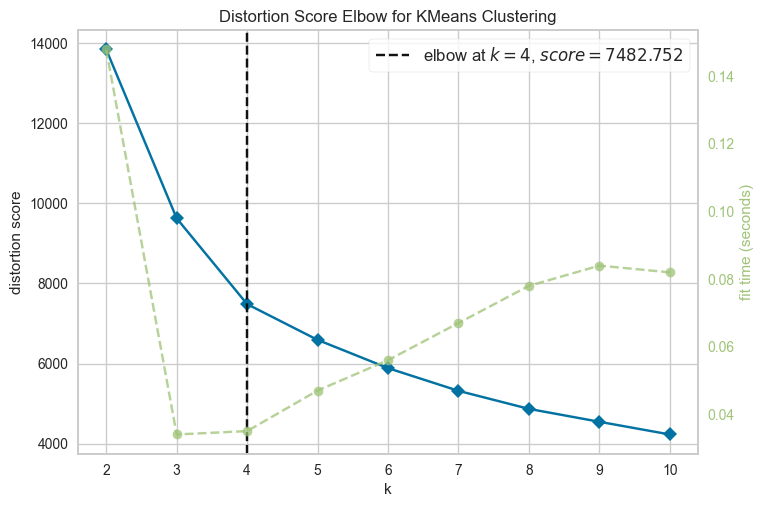

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(PCA_df)
elbow.show()

In [40]:
ag=AgglomerativeClustering(n_clusters=4)
fitt_ag=ag.fit_predict(PCA_df)
PCA_df["clusters"]=fitt_ag

In [41]:
df["clusters"]=fitt_ag

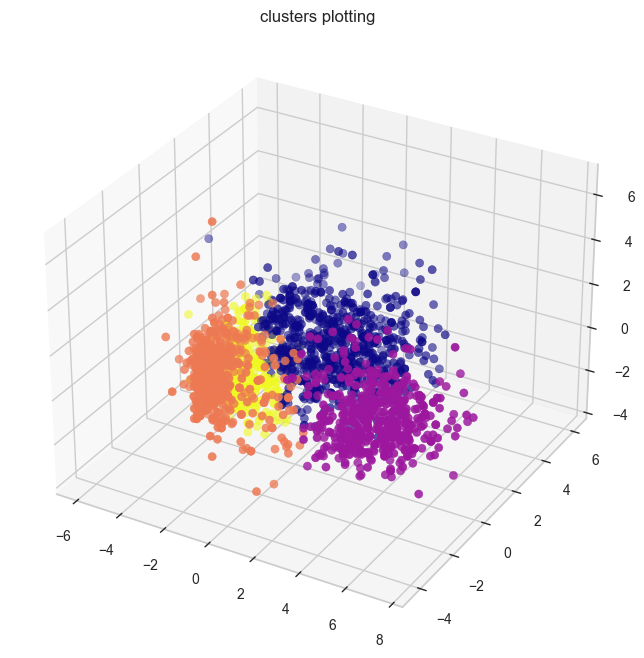

In [42]:
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection="3d")
ax.scatter(x,y,z, c=PCA_df["clusters"], s=35, marker="o", cmap="plasma")
ax.set_title("clusters plotting")
plt.show()

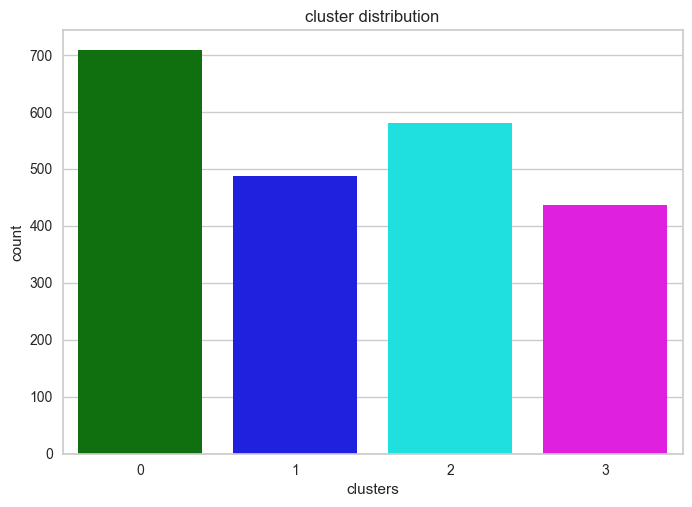

In [43]:
c_pl=sns.countplot(x=df["clusters"], palette=["Green","Blue","Cyan","Magenta"])
c_pl.set_title("cluster distribution")
plt.show()

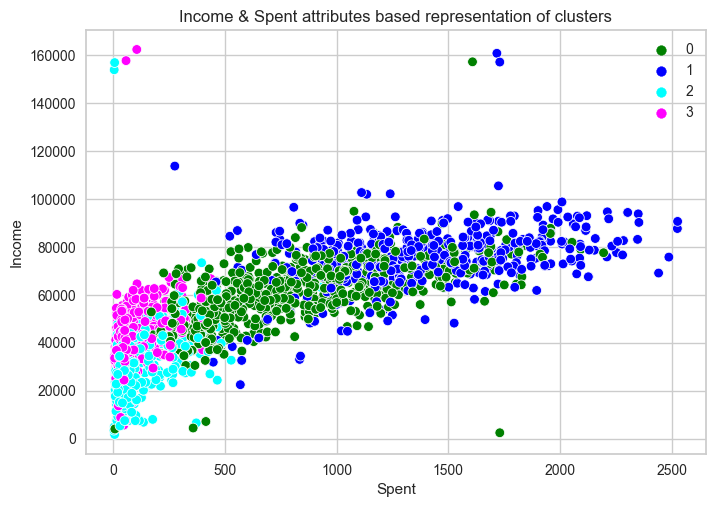

In [44]:
scat=sns.scatterplot(data=df, x=df["Spent"], y=df["Income"], hue=df["clusters"], palette=["Green", "Blue", "Cyan", "Magenta"])
scat.set_title("Income & Spent attributes based representation of clusters")
plt.legend()
plt.show()

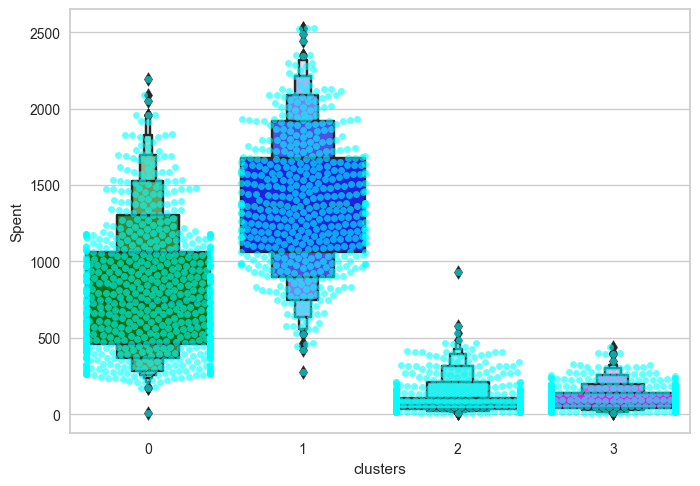

In [45]:
plt.figure()
plot=sns.swarmplot(x=df["clusters"], y=df["Spent"], color="Cyan", alpha=0.6)
plot=sns.boxenplot(x=df["clusters"], y=df["Spent"], palette=["Green", "Blue", "Cyan", "Magenta"])
plt.show()

In [46]:
df["Total_Promos"]=df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]

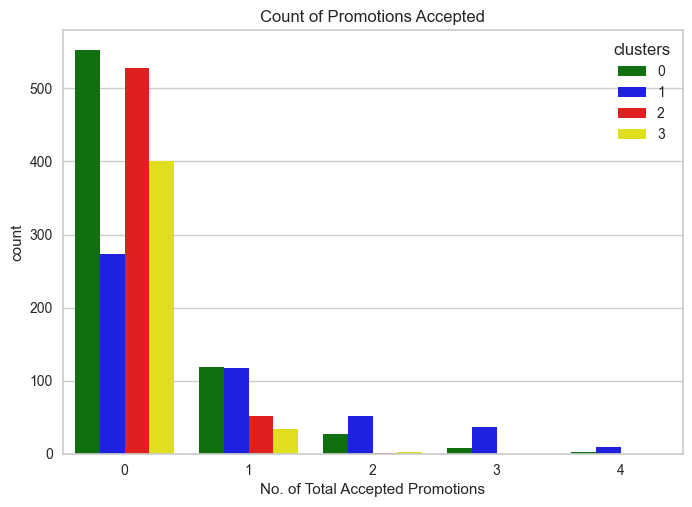

In [47]:
plt.figure()
cp=sns.countplot(x=df["Total_Promos"], hue=df["clusters"], palette=["Green","Blue","Red","Yellow"])
cp.set_title("Count of Promotions Accepted")
cp.set_xlabel("No. of Total Accepted Promotions")
plt.show()

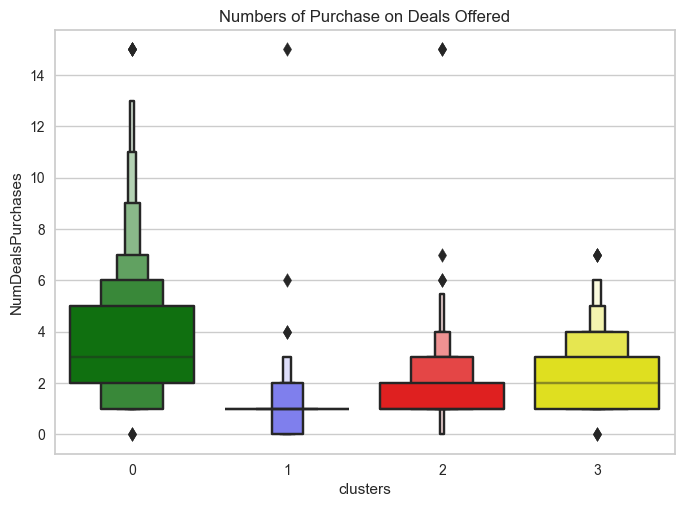

In [48]:
plt.figure()
box=sns.boxenplot(y=df["NumDealsPurchases"], x=df["clusters"], palette=["Green","Blue","Red","Yellow"])
box.set_title("Numbers of Purchase on Deals Offered")
plt.show()

<Figure size 800x550 with 0 Axes>

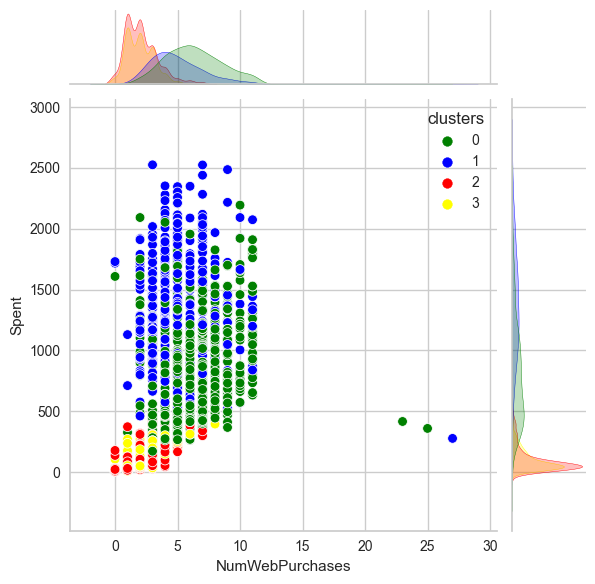

<Figure size 800x550 with 0 Axes>

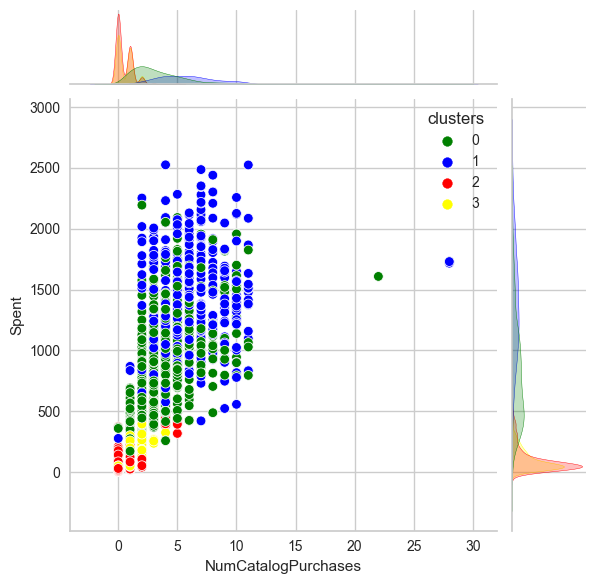

<Figure size 800x550 with 0 Axes>

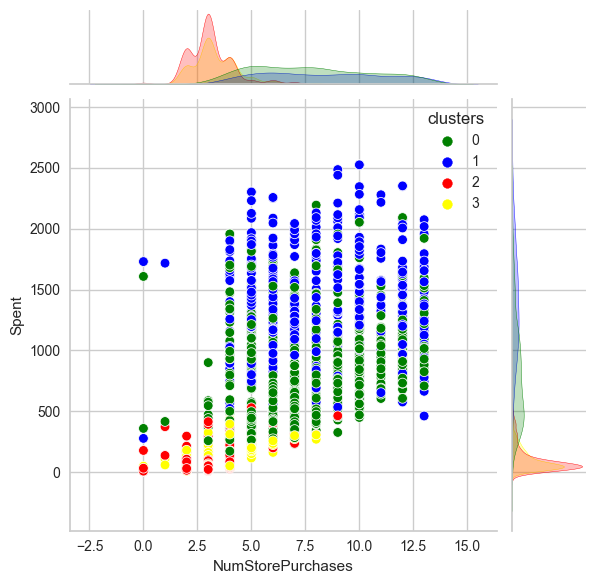

<Figure size 800x550 with 0 Axes>

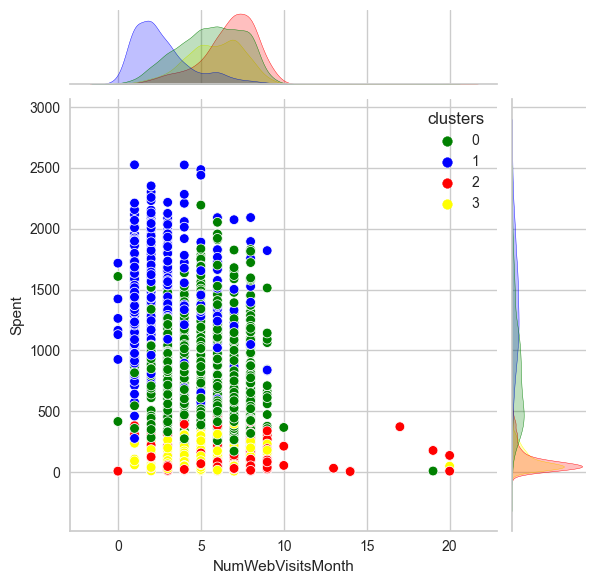

In [49]:
pur_style=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]
for i in pur_style:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue=df["clusters"], palette=["Green","Blue","Red","Yellow"])
    plt.show()

<Figure size 800x550 with 0 Axes>

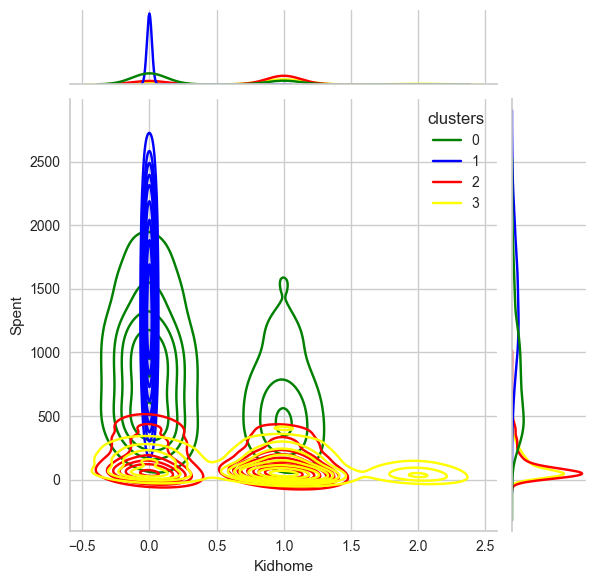

<Figure size 800x550 with 0 Axes>

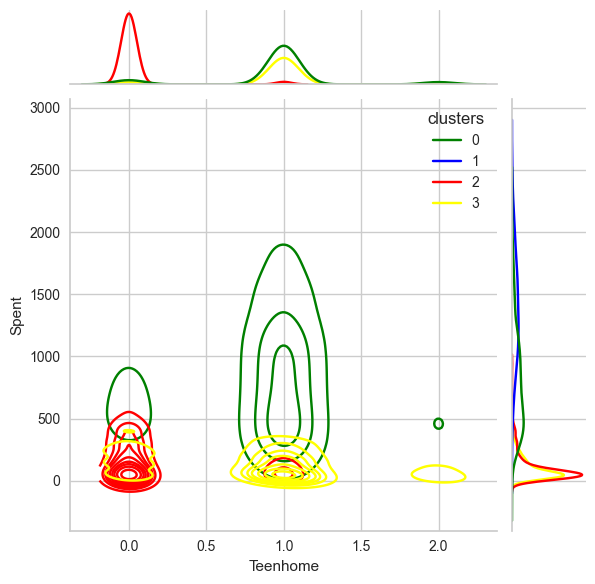

<Figure size 800x550 with 0 Axes>

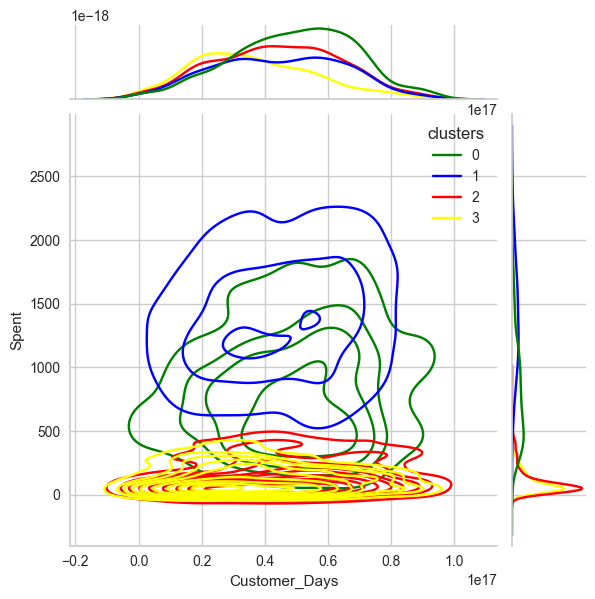

<Figure size 800x550 with 0 Axes>

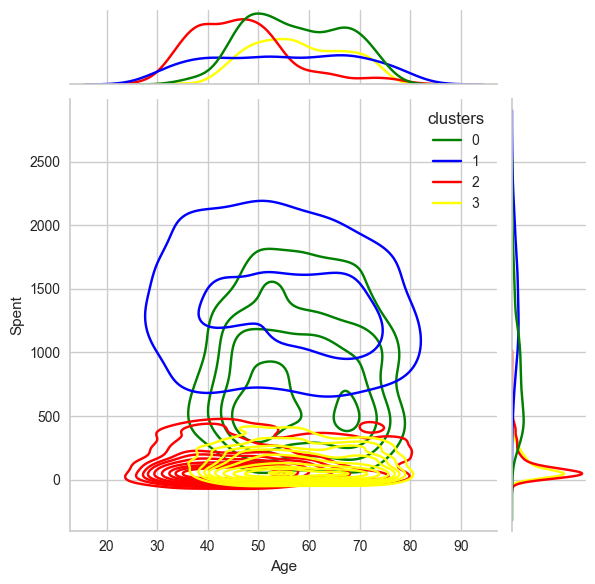

<Figure size 800x550 with 0 Axes>

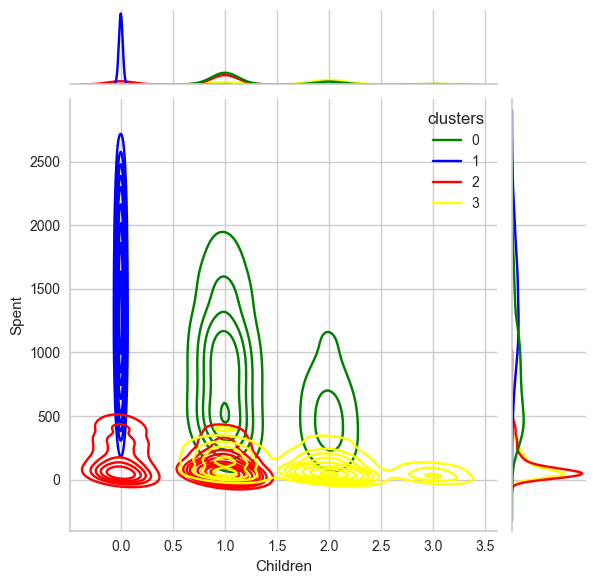

<Figure size 800x550 with 0 Axes>

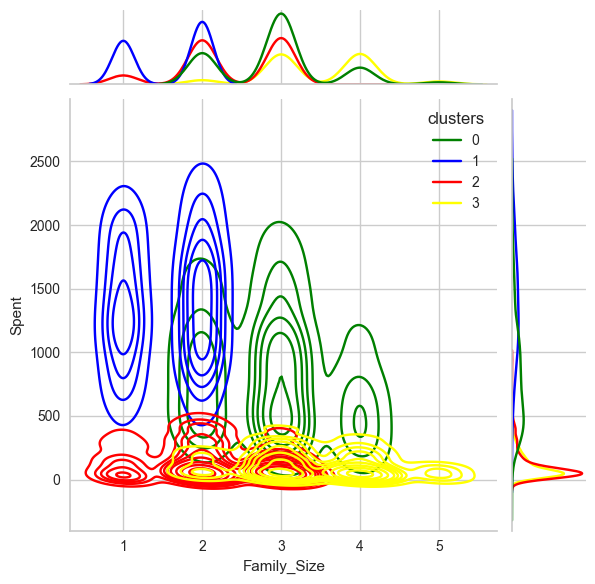

<Figure size 800x550 with 0 Axes>

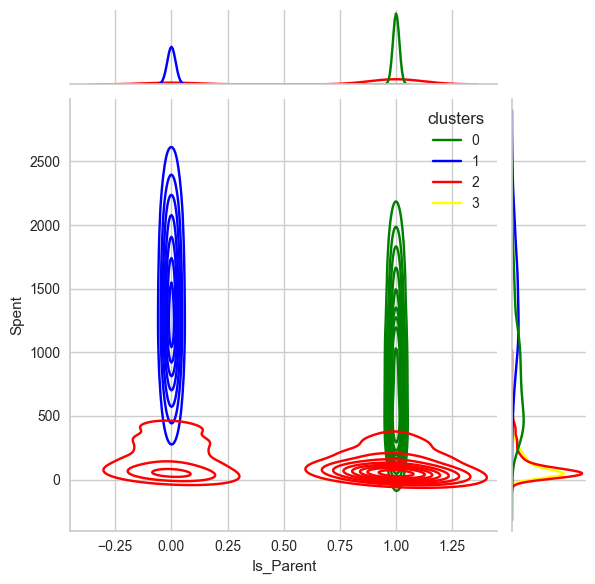

<Figure size 800x550 with 0 Axes>

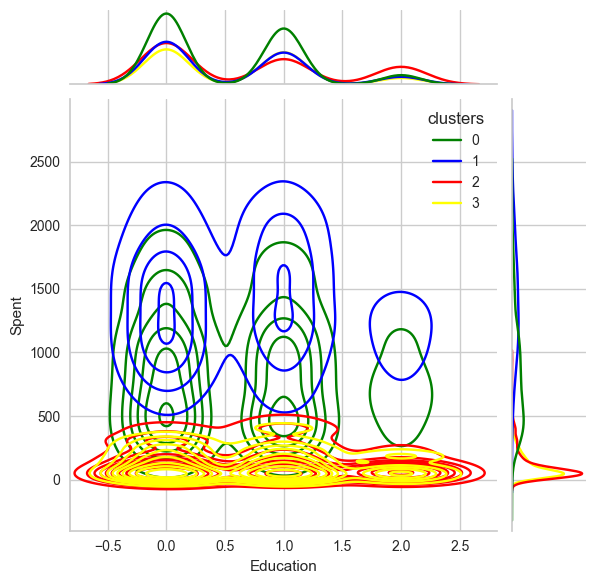

<Figure size 800x550 with 0 Axes>

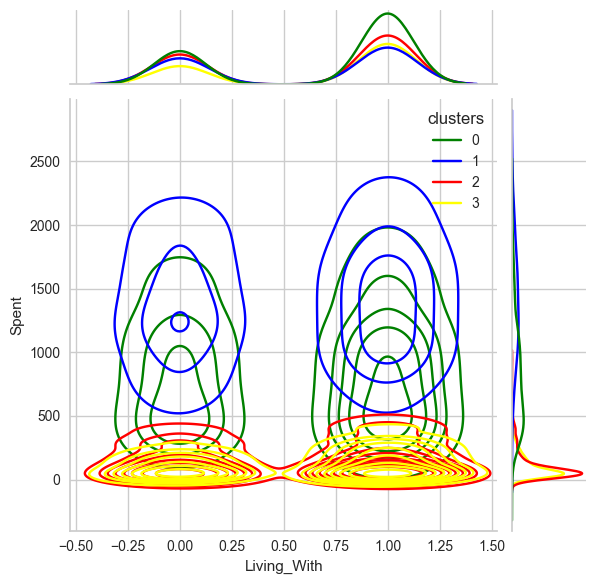

In [52]:
personal_inform=["Kidhome", "Teenhome", "Customer_Days", "Age", "Children", "Family_Size",
                 "Is_Parent", "Education", "Living_With"]
for i in personal_inform:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue=df["clusters"], kind="kde", palette=["Green", "Blue", "Red", "Yellow"])
    plt.show()